In [1]:
#@title load package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import grb.particle_filter
import grb.particle_filter_tv
from tqdm import tqdm

importlib.reload(grb.particle_filter)
importlib.reload(grb.particle_filter_tv)
from grb.particle_filter import GRParticleFilter
from grb.particle_filter_tv import TimeVariantGRParticleFilter

In [2]:
dat = pd.read_csv('../data/demo.csv')
print(f"event size: {dat.shape[0]}")
print(f"minimum magnitude: {dat['mag'].min()}")
print(f"maximum magnitude: {dat['mag'].max()}")
display(dat.head(3))

event size: 2768
minimum magnitude: 3.0
maximum magnitude: 9.0


,date_time,mag
0,1998-01-02 02:06:04,3.9
1,1998-01-19 17:33:38,3.0
2,1998-01-24 10:06:01,3.6


In [3]:
np.random.seed(123)
num_particle = 50_000
log_sig_log_beta_grid = np.linspace(-6, -1, num=10)

100%|██████████| 2766/2766 [00:47<00:00, 58.67it/s]


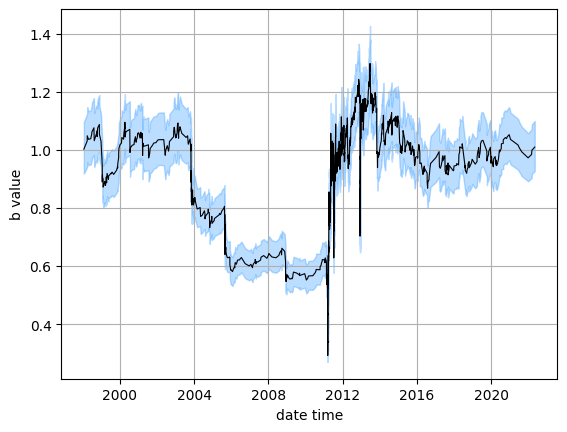

In [4]:
#@title 粒子フィルタ（普通のGR）
model = GRParticleFilter(
    num_particle=num_particle,
    log_sig_log_beta=np.nan,
    m_lower=3.0,
)
res_tuning = model.tuning_hyper_parameter(
    m=dat['mag'].values, 
    date_time=dat.index.values,
    initial_cut_len=1000, 
    method='optimizer', 
    log_sig_log_beta_grid=log_sig_log_beta_grid, 
)
res_df_gr = model.batch(m=dat['mag'].values, date_time=dat['date_time'].values, ql=0.6, qu=0.7, ql2=0.55, qu2=0.65)
plt.plot(pd.to_datetime(res_df_gr['date_time']), res_df_gr['b_med'], color='black', linewidth=0.8)
plt.fill_between(pd.to_datetime(res_df_gr['date_time']), res_df_gr['b_qu'], res_df_gr['b_ql'], color='dodgerblue', alpha=0.3)
plt.xlabel('date time')
plt.ylabel('b value')
plt.grid()
plt.show()

100%|██████████| 2766/2766 [00:42<00:00, 64.82it/s]


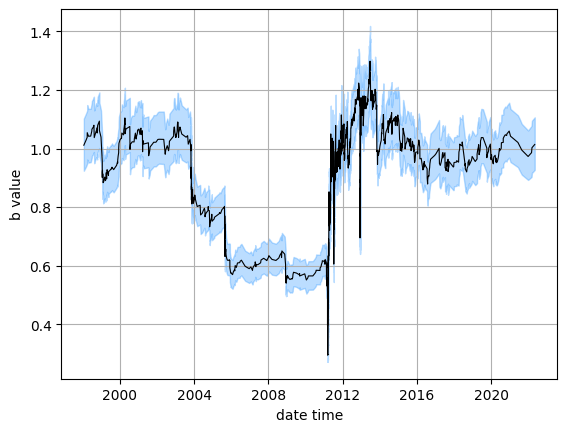

In [5]:
#@title 粒子フィルタ（truncatedのGR）
model = GRParticleFilter(
    num_particle=num_particle,
    log_sig_log_beta=np.nan,
    type='tGR',
    m_lower=3.0,
    m_upper=9.0
)
res_tuning = model.tuning_hyper_parameter(
    m=dat['mag'].values, 
    date_time=dat.index.values,
    initial_cut_len=1000,
    method='optimizer', 
    log_sig_log_beta_grid=log_sig_log_beta_grid, 
)
res_df_gr = model.batch(m=dat['mag'].values, date_time=dat['date_time'].values, ql=0.6, qu=0.7, ql2=0.55, qu2=0.65)
plt.plot(pd.to_datetime(res_df_gr['date_time']), res_df_gr['b_med'], color='black', linewidth=0.8)
plt.fill_between(pd.to_datetime(res_df_gr['date_time']), res_df_gr['b_qu'], res_df_gr['b_ql'], color='dodgerblue', alpha=0.3)
plt.xlabel('date time')
plt.ylabel('b value')
plt.grid()
plt.show()